## Data Generation

### created by Yuying Liu, 04/30/2020

Generaging data of toy problem 2.

$$\Phi(x, y, t) = \left\{\begin{matrix}
cos(w_0t)& when 
\end{matrix}\right.$$


In [1]:
import os
import sys
import numpy as np
import scipy as sp
from scipy import integrate
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch

module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
import utils

In [2]:
# paths
data_dir = '../data/toy2'
result_dir = '../result/toy2'

In [16]:
# params
w0 = 0.5
w1 = 1.0
width_small = 8

# mesh grids
n_train = 100
n_timesteps = 500
n_per_dim = 128
num_periods_big = 80
num_total_data_points = 5000

x = np.arange(n_per_dim)
y = np.arange(n_per_dim)
t = np.linspace(0, num_periods_big*4*np.pi, num_total_data_points)

dt = 1

xgrid, ygrid, tgrid = np.meshgrid(x, y, t)

Phi = np.cos(w0*tgrid)
print(Phi.shape)

Phi[3*width_small:4*width_small, 3*width_small:4*width_small,:] = np.cos(w0*tgrid[3*width_small:4*width_small, 3*width_small:4*width_small,:]+np.pi/4)
scaled_Phi = (Phi.T - Phi.min()) / (Phi.max() - Phi.min())
# plt.imshow(Phi[:,:,0])
# plt.colorbar()
print(scaled_Phi.shape)

# Phi = phi1(xgrid, ygrid, tgrid) + phi2(xgrid, ygrid, tgrid)
# scaled_Phi = (Phi - Phi.min()) / (Phi.max() - Phi.min())
# print("scaled_Phi.shape = ", scaled_Phi.shape)
np.save(os.path.join(data_dir, 'data.npy'), scaled_Phi)

(128, 128, 5000)
(5000, 128, 128)


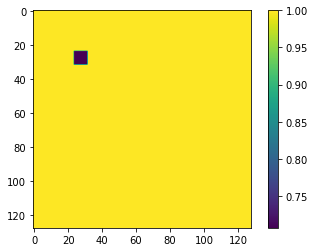

In [9]:
plt.imshow(Phi[:,:,0])
plt.colorbar()

In [12]:
Phi[:100].shape

(100, 128, 128)

Animating, may take a little while...
.....Done! gif saved to  ../result/toy2\original_data.gif


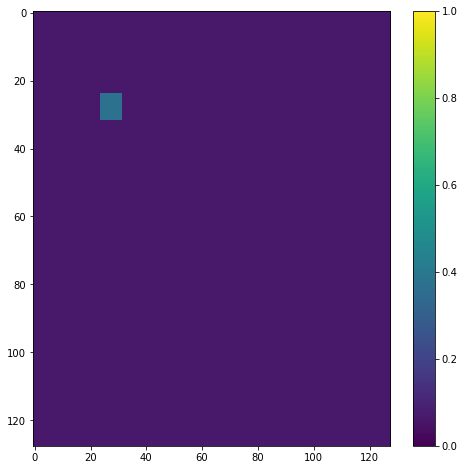

In [15]:
utils.animate(torch.tensor(scaled_Phi[:100]).unsqueeze(1), os.path.join(result_dir, 'original_data.gif'))

In [ ]:
sol = np.cos(w0*t[:500])
plt.plot(sol)

plt.plot(np.cos(w1*t[:500]))